<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Master/Fault_Detect_ind_coef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
filenames = glob.glob('/content/gdrive/My Drive/Colab_Data/Fault_Detect_2/train_data_ind/*.csv')
print(len(filenames))

len_files = len(filenames)

900


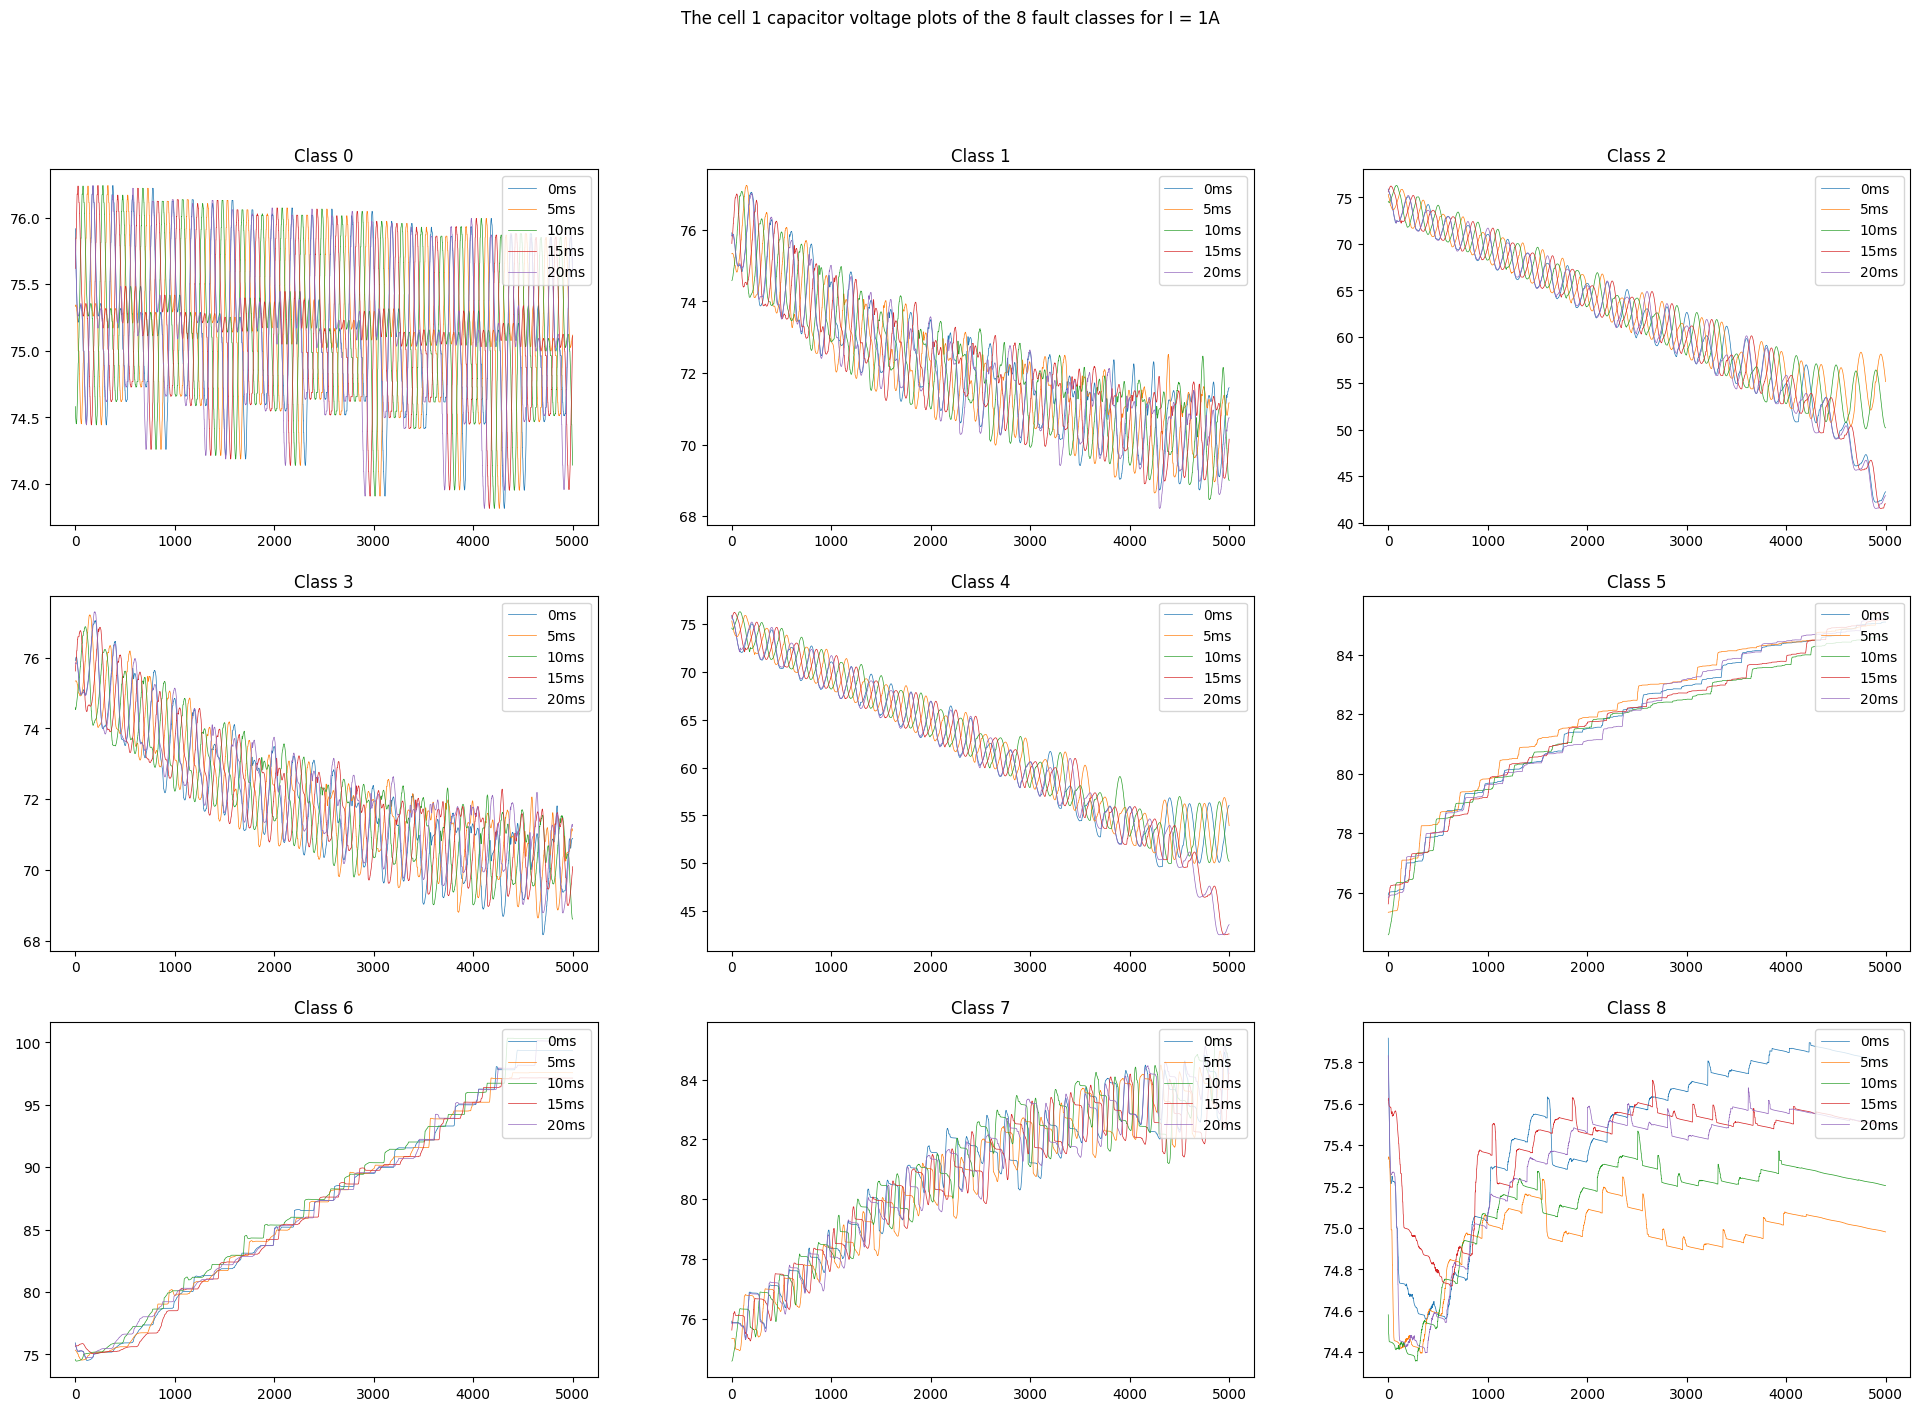

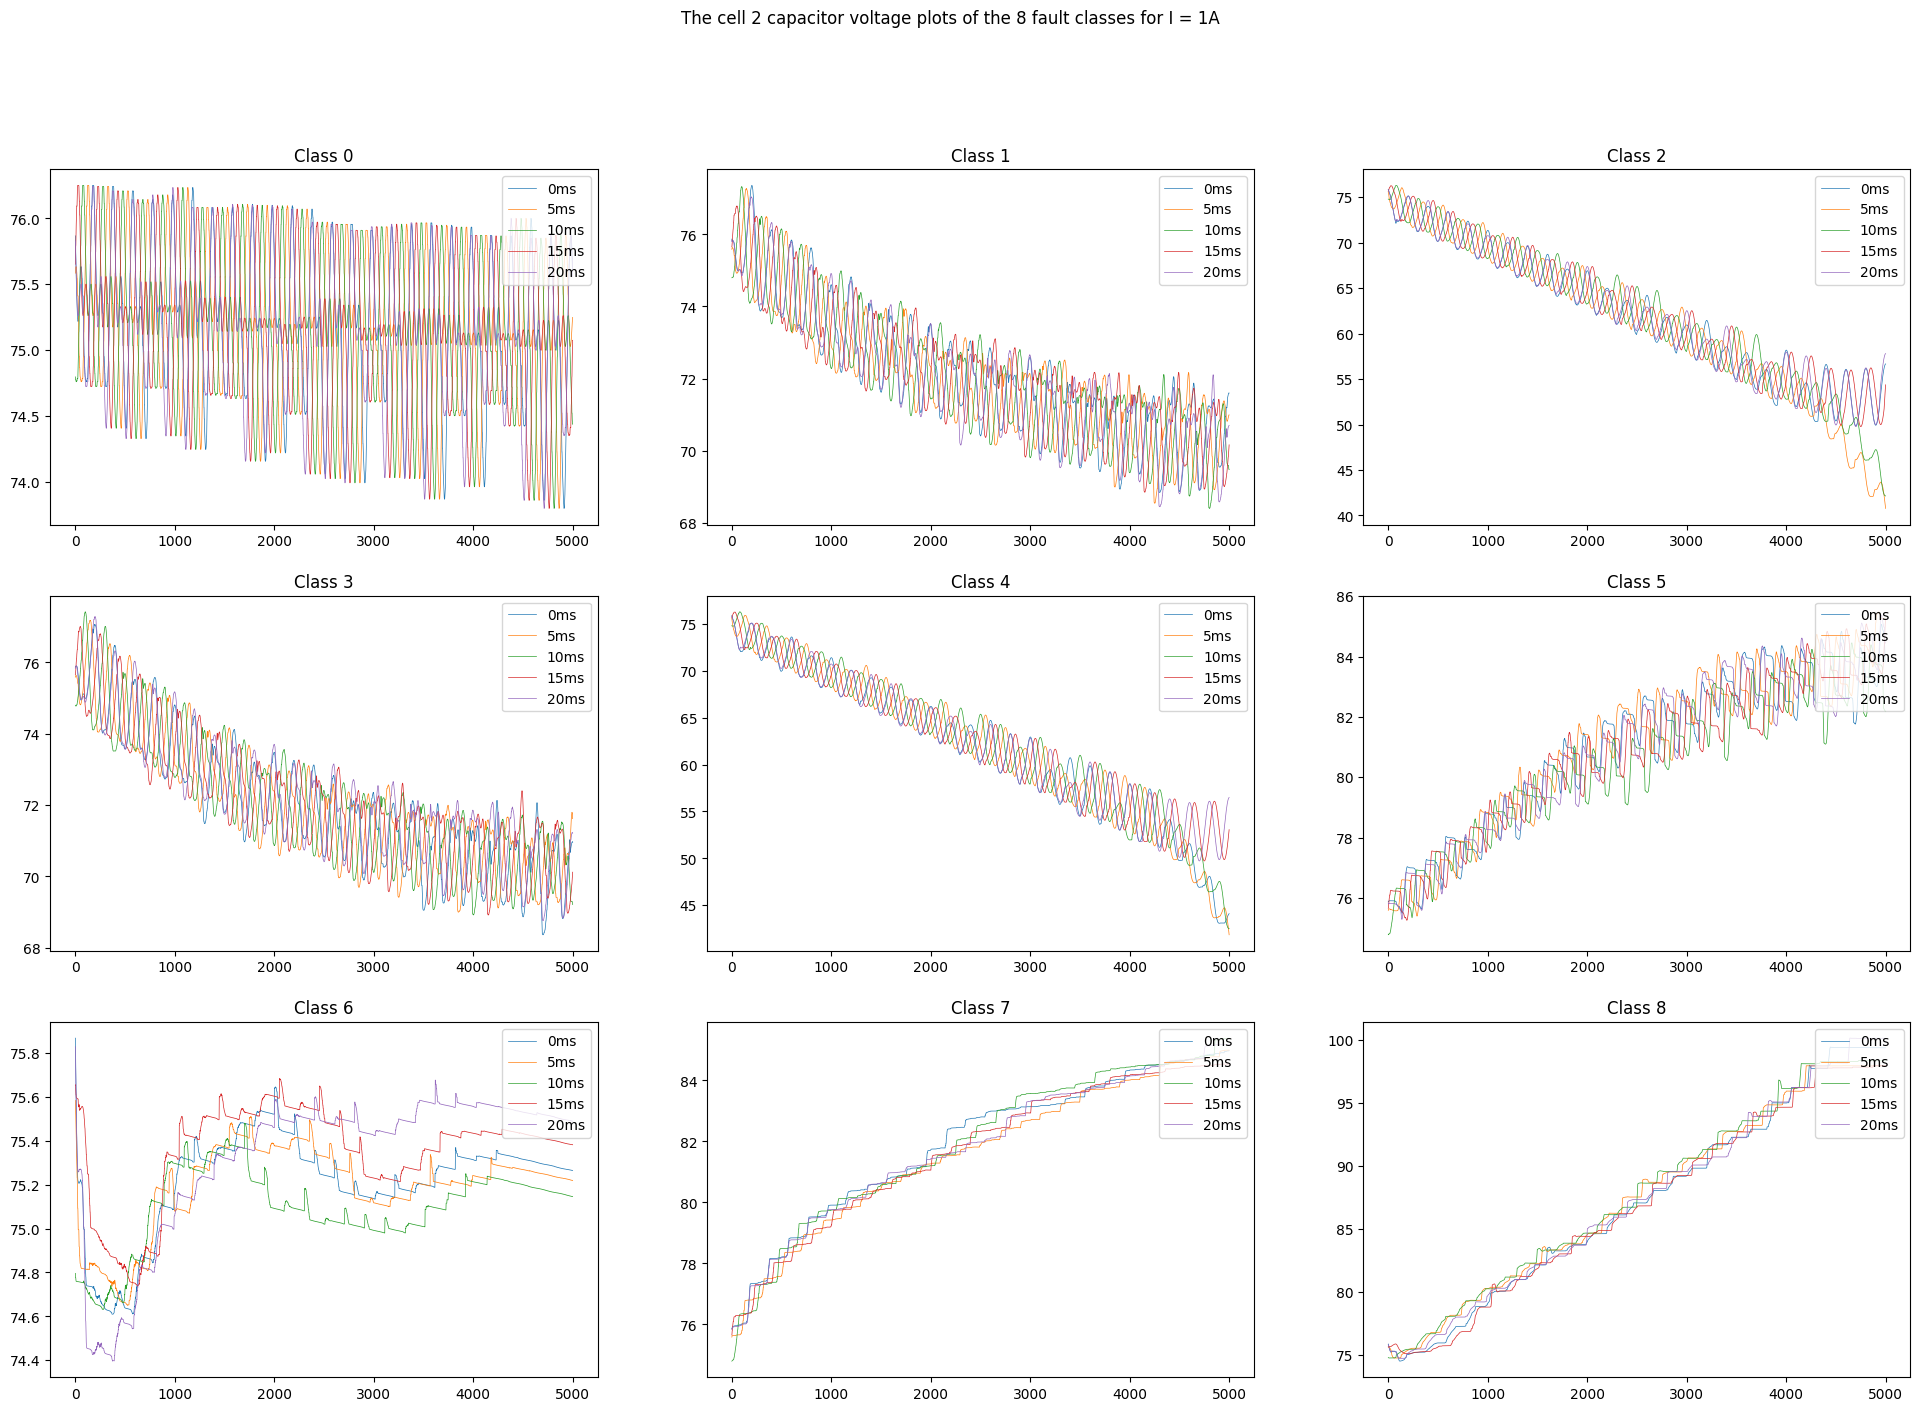

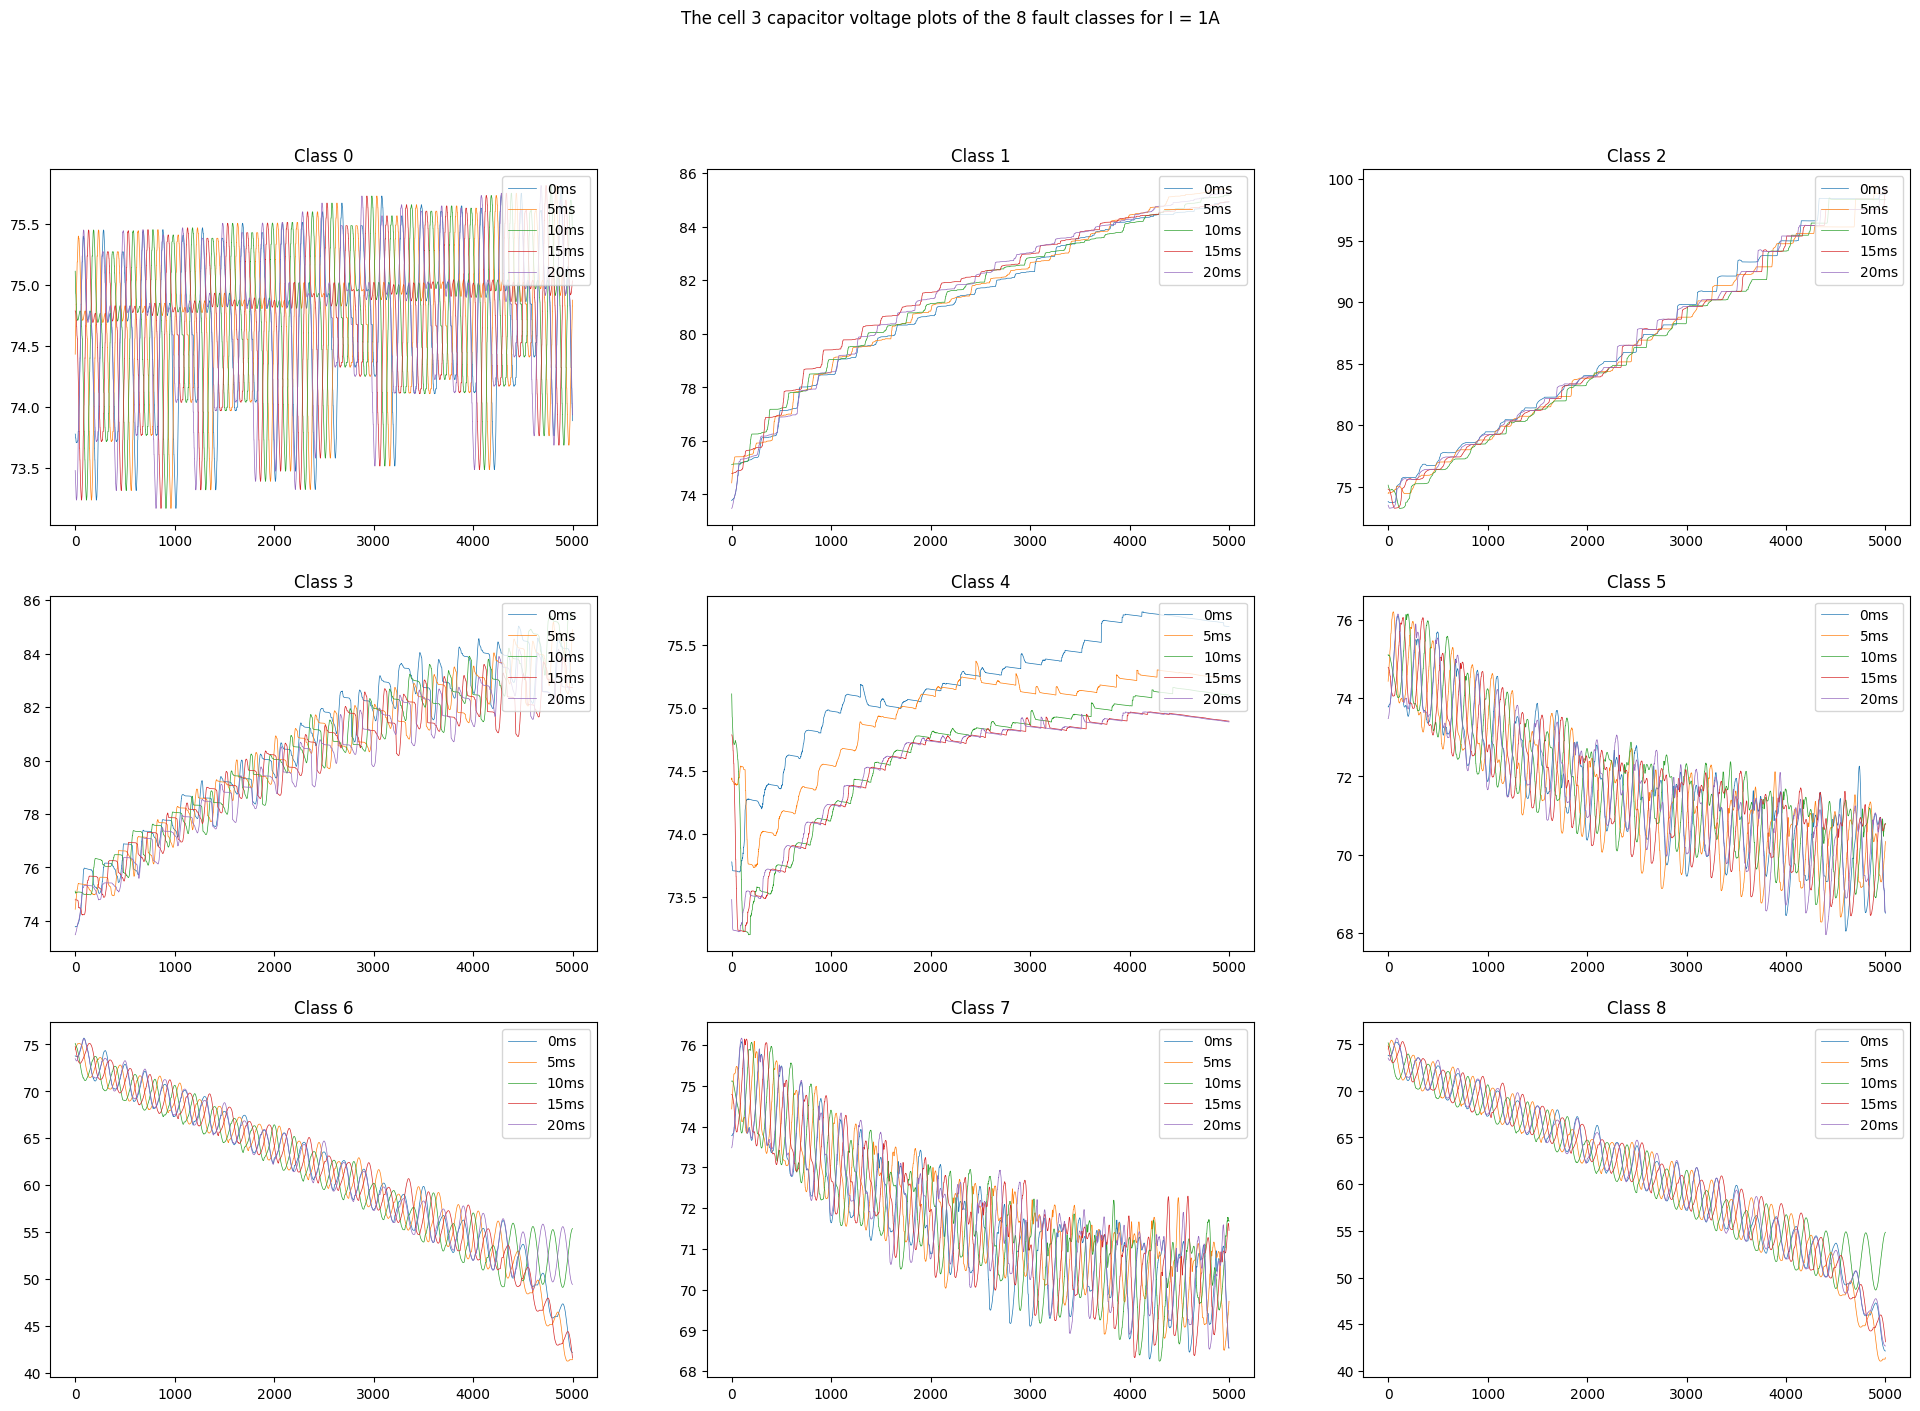

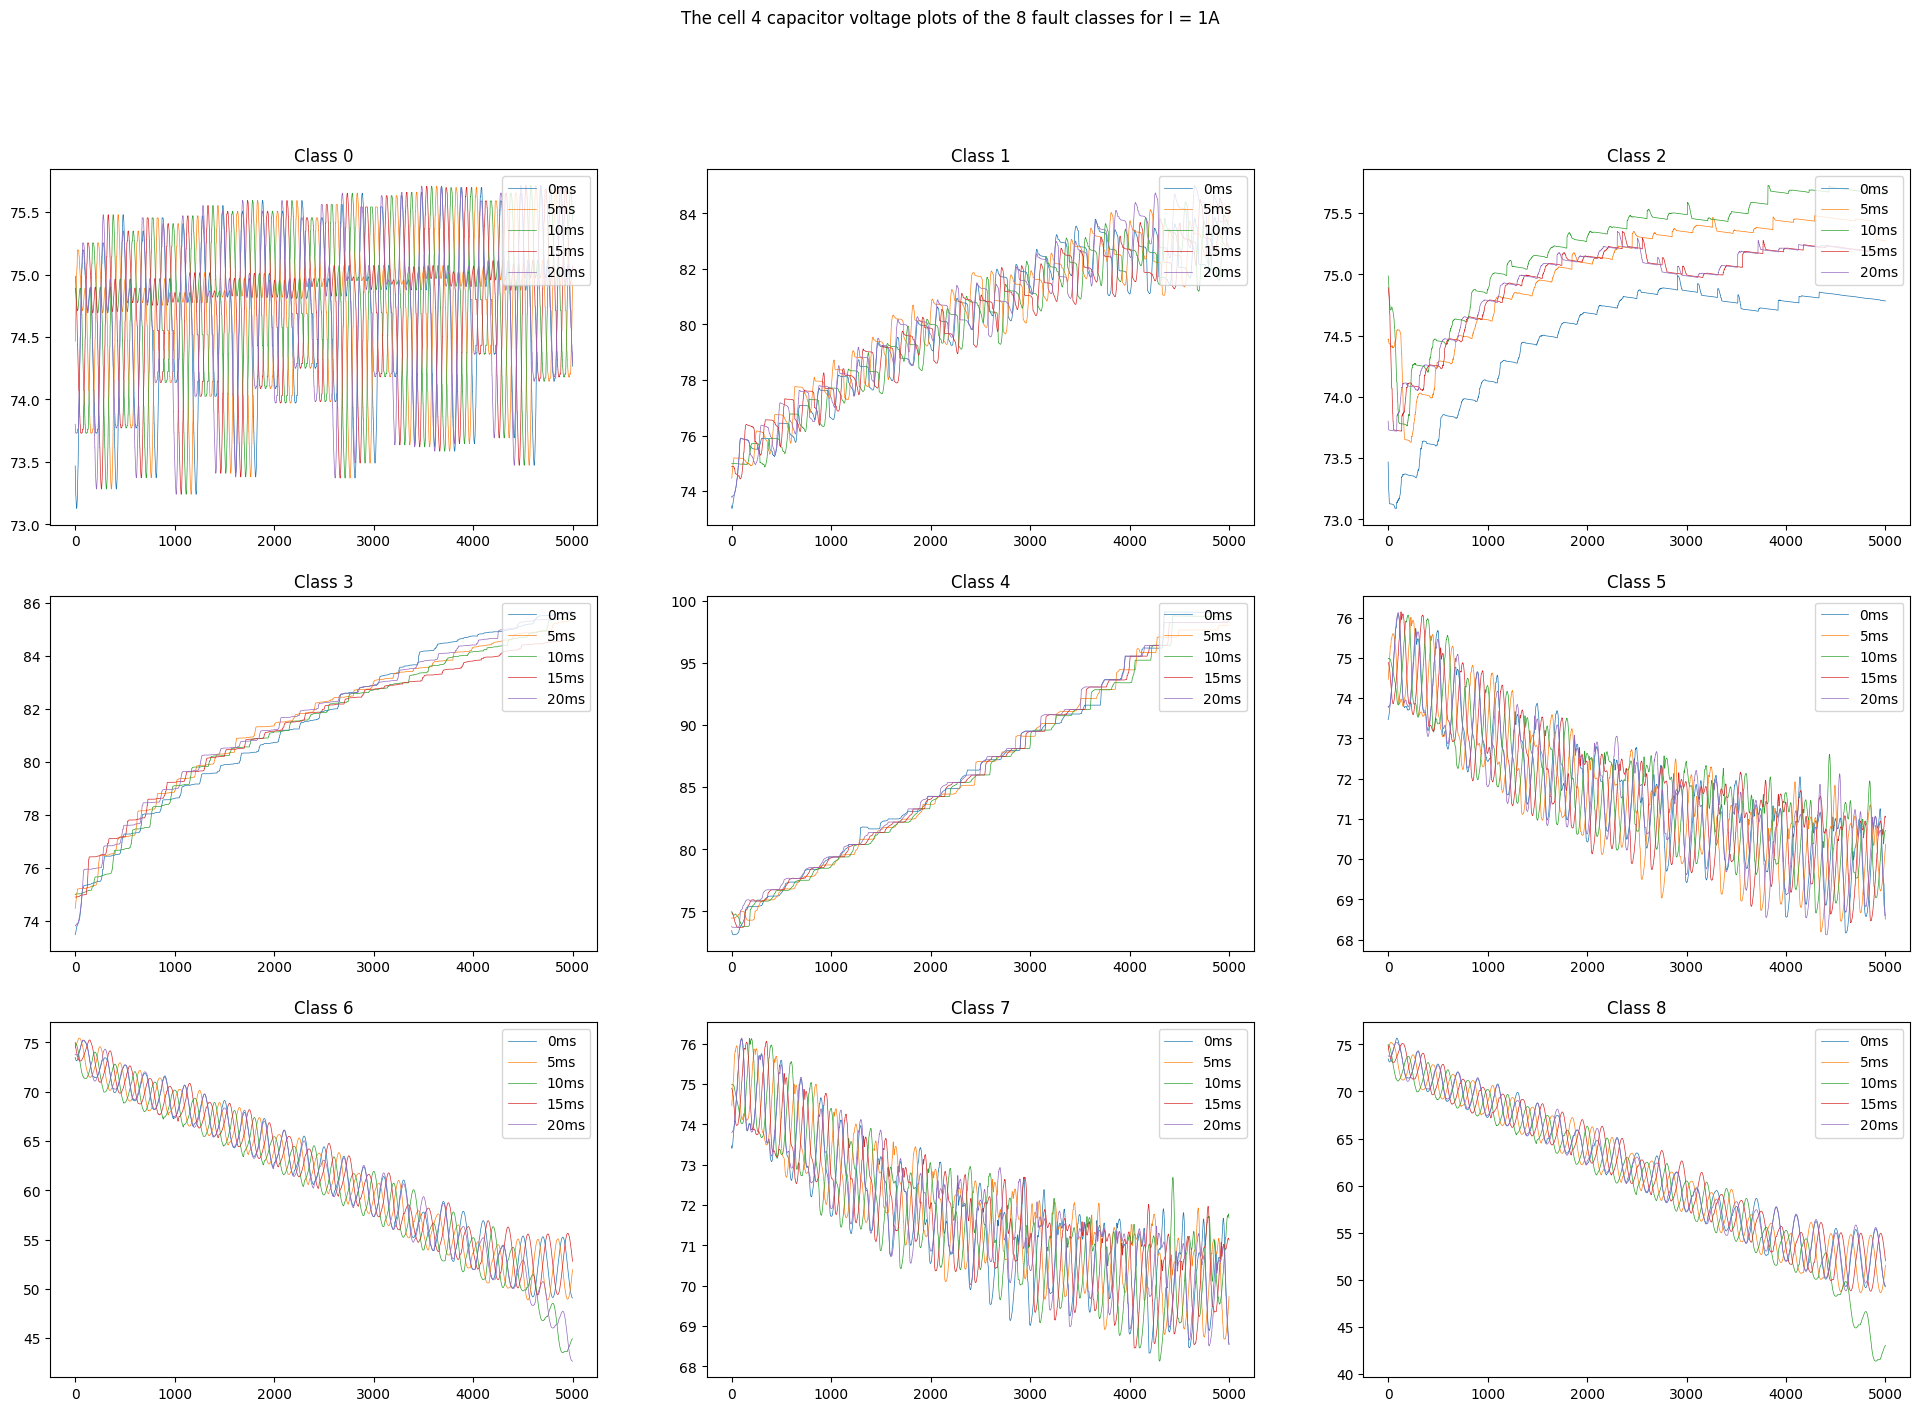

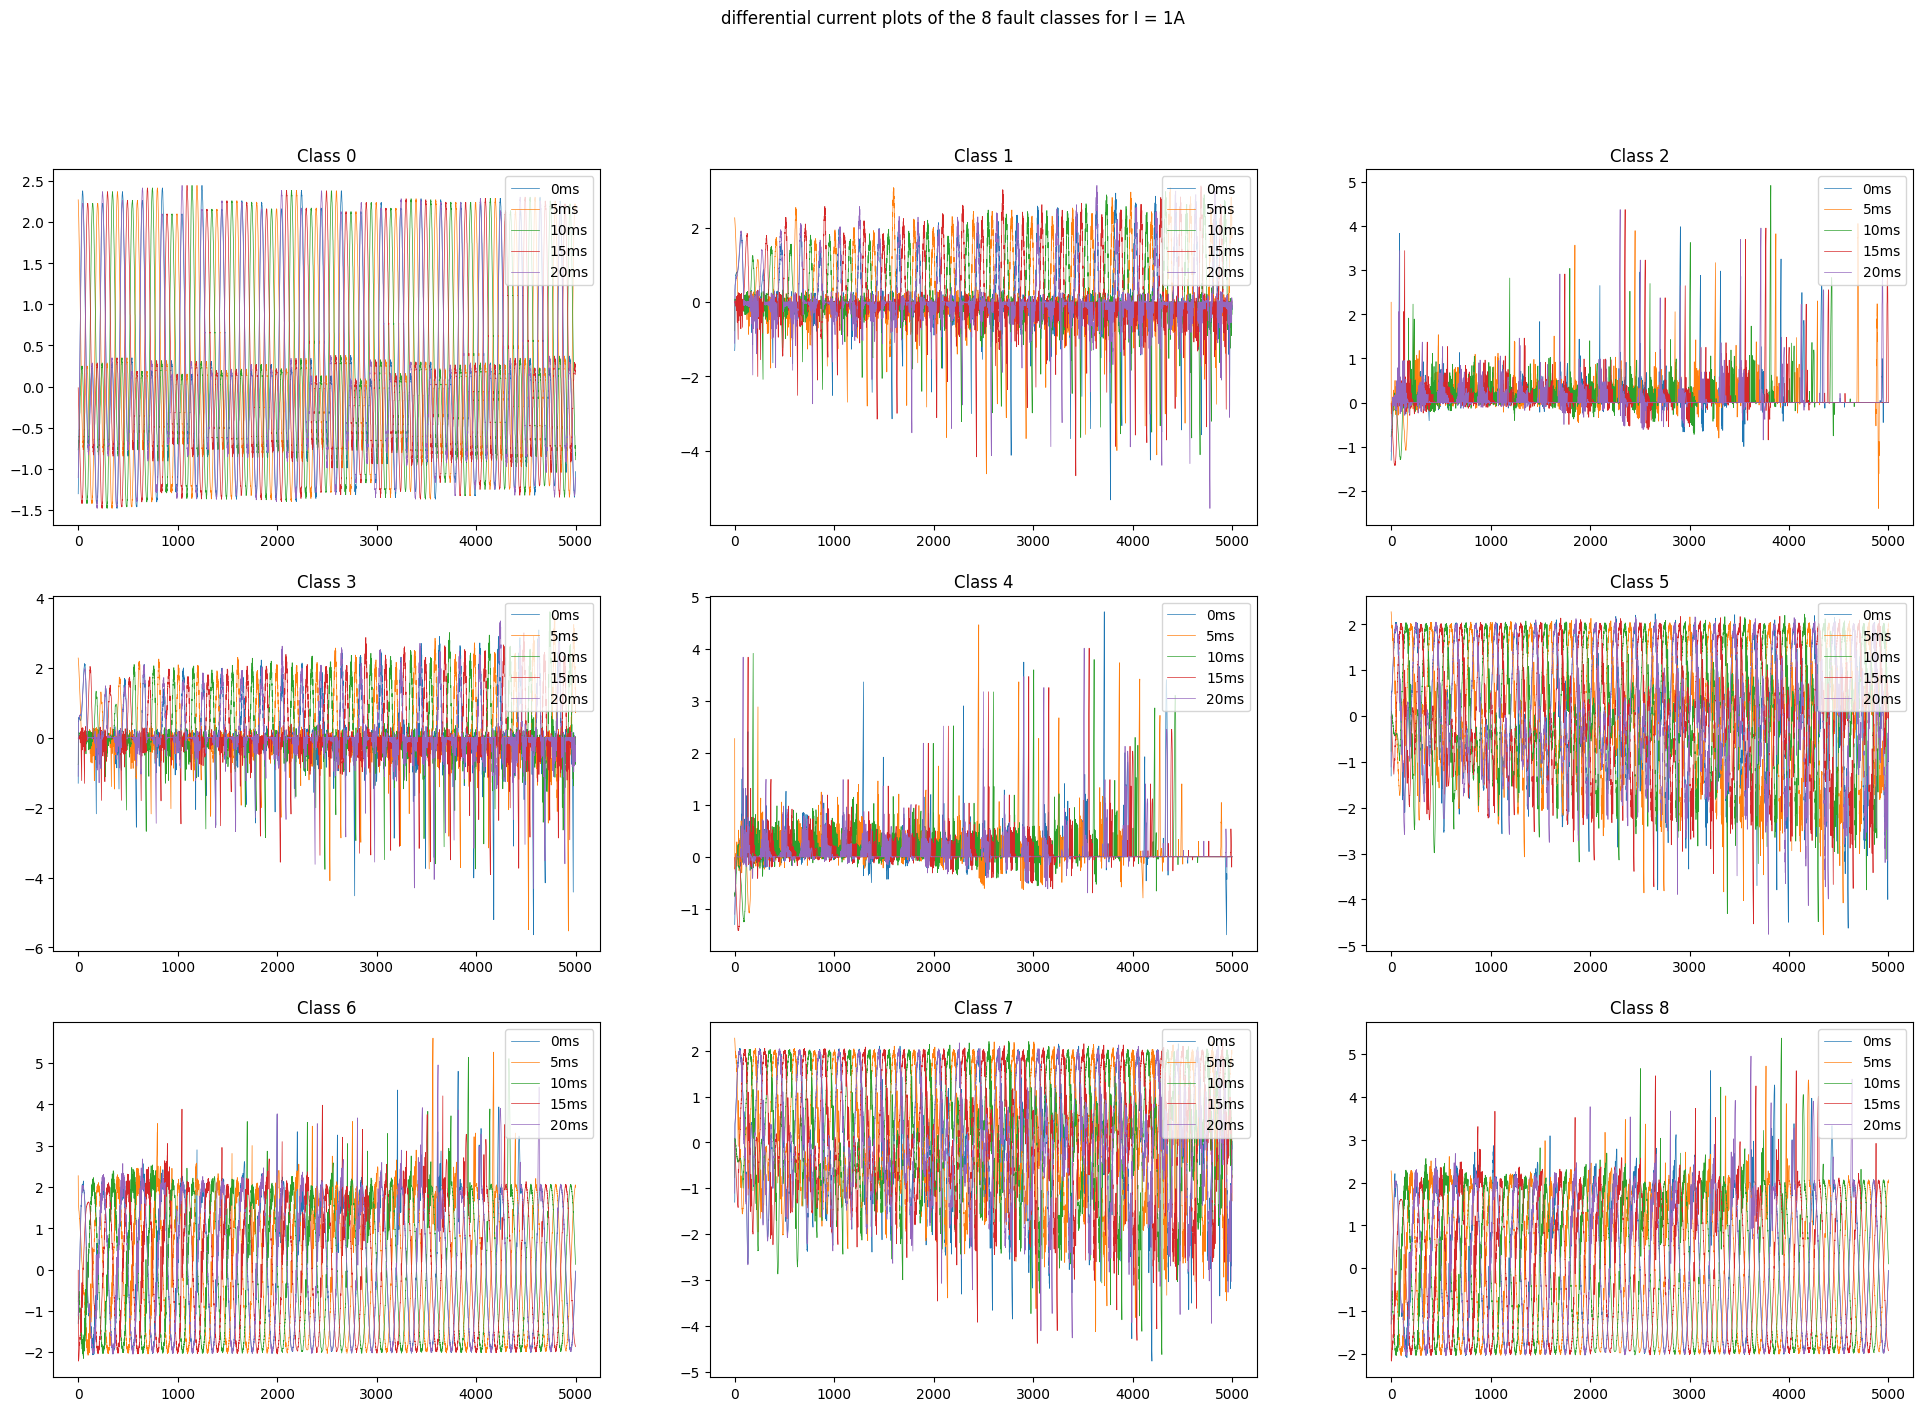

In [7]:
plt.rcParams['figure.figsize']=[24,16]
plt.rcParams['figure.dpi'] = 100


time_bias = ['0ms','5ms','10ms','15ms','20ms']
cs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
plt_name = ['Cell_1_Cap_V', 'Cell_2_Cap_V', 'Cell_3_Cap_V', 'Cell_4_Cap_V', 'Diff_I']


for Vi in range(2, 7):
  n=1
  for loc_fn in range(0,45,5):
    
    plt.subplot(3,3,n).set_title("Class {}".format(cs[n-1]))
    
  # data = numpy.loadtxt(fname=filenames[loc_fn], delimiter=',')
  # Samples = data[..., 0]
  # V = data[..., 2]
  # plt.plot(Samples, V, linewidth=0.5)
    

    for ts in range (0, 5):
      data = numpy.loadtxt(fname=filenames[loc_fn+ts], delimiter=',')
      Samples = data[..., 0]
      V = data[..., Vi]
      
      plt.plot(Samples, V, linewidth=0.5)
      #print(ts)
      #print(time_bias[ts])
    plt.legend(time_bias, loc ='upper right')
      
    n=n+1
  if Vi != 6:
    plt.suptitle('The cell {} capacitor voltage plots of the 8 fault classes for I = 1A'.format(Vi-1))
  elif Vi == 6:
    plt.suptitle('differential current plots of the 8 fault classes for I = 1A')
  plt.savefig('/content/gdrive/My Drive/Colab_Data/Fault_Detect_2/ind/plot{}.png'.format(plt_name[Vi-2]), dpi=300)
  plt.show()


In [8]:
for fn_loc in range(len_files):
  data_file = numpy.loadtxt(fname=filenames[fn_loc], delimiter=',')
  if (fn_loc==0):
    all_final_data = data_file
  if (fn_loc > 0):
    all_final_data = numpy.append(all_final_data, data_file, axis=0)

print (data_file.shape)
print(all_final_data.shape)

(5000, 8)
(4500000, 8)


In [9]:
Data_temp_X = all_final_data[:5000,2:7]
Data_temp_Y = all_final_data[:,7]
print(Data_temp_X.shape)
data_temp_trans_X = numpy.transpose(Data_temp_X)
Data_temp_X[:10]
data_temp_trans_X[:10]
print(Data_temp_Y.shape)
print(Data_temp_Y[5000*10])

(5000, 5)
(4500000,)
2.0


In [10]:
#Rehaping 
shift = 5000

for i in range(len(filenames)):
  if(i == 0):
    Data_Y = all_final_data[:, 7][i*shift]
    Data_X = numpy.transpose(all_final_data[(shift * i):(shift * (i+1)), 2:7 ])
    
  else:
    Data_Y = numpy.append(Data_Y, all_final_data[:, 7][i*shift])
    Data_X = numpy.append(Data_X , numpy.transpose(all_final_data[(shift * i):(shift * (i+1)), 2:7 ]), axis = 0)

print(Data_Y.shape)
print(Data_X.shape)

(900,)
(4500, 5000)


In [11]:
from keras.utils.np_utils import to_categorical

Data_Y_Cat = to_categorical(Data_Y)


Data_X_final = Data_X.reshape(int(Data_X.shape[0]/5), 5, 5000, 1)

print(Data_X_final.shape)
print(Data_Y_Cat.shape)


(900, 5, 5000, 1)
(900, 9)


In [12]:
#Regularization

for i in range(5):
  Data_X_final[:,i,:] = 2 * (Data_X_final[:,i,:] - Data_X_final[:,i,:].mean())/(Data_X_final[:,i,:].max() - Data_X_final[:,i,:].min())
print(Data_X_final[:,1,:])


[[[0.12011982]
  [0.12004589]
  [0.11861649]
  ...
  [0.11373682]
  [0.11366289]
  [0.11257851]]

 [[0.1131207 ]
  [0.11349037]
  [0.11376146]
  ...
  [0.10451966]
  [0.10474147]
  [0.10484004]]

 [[0.09370059]
  [0.09323234]
  [0.09323234]
  ...
  [0.0849024 ]
  [0.08482846]
  [0.08482846]]

 ...

 [[0.09488354]
  [0.09488354]
  [0.09488354]
  ...
  [0.12117955]
  [0.12117955]
  [0.12117955]]

 [[0.09478496]
  [0.10225234]
  [0.10279453]
  ...
  [0.12487627]
  [0.12487627]
  [0.12487627]]

 [[0.15716097]
  [0.15984725]
  [0.16196671]
  ...
  [0.12186961]
  [0.12184496]
  [0.12174638]]]


In [13]:
print(Data_X_final.shape)
print(Data_Y_Cat.shape)

(900, 5, 5000, 1)
(900, 9)


In [14]:
from sklearn.utils import shuffle

Data_X_final, Data_Y_Cat = shuffle(Data_X_final, Data_Y_Cat, random_state = 0)

Train_X = Data_X_final[:int(len(Data_X_final)*0.7)]
Train_Y = Data_Y_Cat[:int(len(Data_Y_Cat)*0.7)]
Vald_X = Data_X_final[int(len(Data_X_final)*0.7):int(len(Data_X_final)*0.85)]
Vald_Y = Data_Y_Cat[int(len(Data_Y_Cat)*0.7):int(len(Data_Y_Cat)*0.85)]
Test_X = Data_X_final[int(len(Data_X_final)*0.85):]
Test_Y = Data_Y_Cat[int(len(Data_Y_Cat)*0.85):]

print("The shape of the Input:", Data_X_final.shape)
print("The shape of the Training X:",Train_X.shape)
print("The shape of the Validate X:",Vald_X.shape)
print("The shape of the Testing X:",Test_X.shape)
print ("")
print("The shape of the Output:",Data_Y_Cat.shape)
print("The shape of the Training Y:",Train_Y.shape)
print("The shape of the Validate Y:",Vald_Y.shape)
print("The shape of the Testing Y:",Test_Y.shape)


The shape of the Input: (900, 5, 5000, 1)
The shape of the Training X: (630, 5, 5000, 1)
The shape of the Validate X: (135, 5, 5000, 1)
The shape of the Testing X: (135, 5, 5000, 1)

The shape of the Output: (900, 9)
The shape of the Training Y: (630, 9)
The shape of the Validate Y: (135, 9)
The shape of the Testing Y: (135, 9)


In [15]:
import keras
from keras import layers


inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
x = layers.Conv2D(filters = 25, kernel_size = (1, 5),strides=(1, 2), activation = "relu") (inputs)
#x = layers.Conv2D(filters = 50, kernel_size = (1, 5),strides=(1, 2), activation = "relu") (x)                 # first Trial 13/12/2022
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size = (1,100)) (x)

x = layers.Flatten()(x) 
x = layers.Dense(128, activation="relu")(x) 

outputs = layers.Dense(Data_Y_Cat.shape[1], activation='softmax')(x)
model = keras.Model(inputs, outputs, name="model") 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 5, 2498, 25)       150       
                                                                 
 batch_normalization (BatchN  (None, 5, 2498, 25)      100       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 24, 25)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 128)               384128

In [16]:
history = model.fit(Train_X, Train_Y, epochs=50,batch_size = 125, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/50
6/6 - 8s - loss: 1.3859 - accuracy: 0.4492 - val_loss: 1.6704 - val_accuracy: 0.4593 - 8s/epoch - 1s/step
Epoch 2/50
6/6 - 0s - loss: 0.9505 - accuracy: 0.5984 - val_loss: 1.5595 - val_accuracy: 0.5259 - 207ms/epoch - 35ms/step
Epoch 3/50
6/6 - 0s - loss: 0.8929 - accuracy: 0.6444 - val_loss: 1.5295 - val_accuracy: 0.5111 - 187ms/epoch - 31ms/step
Epoch 4/50
6/6 - 0s - loss: 0.7219 - accuracy: 0.6317 - val_loss: 1.5048 - val_accuracy: 0.5407 - 177ms/epoch - 30ms/step
Epoch 5/50
6/6 - 0s - loss: 0.7201 - accuracy: 0.6524 - val_loss: 1.5010 - val_accuracy: 0.5630 - 177ms/epoch - 30ms/step
Epoch 6/50
6/6 - 0s - loss: 0.6729 - accuracy: 0.6651 - val_loss: 1.4794 - val_accuracy: 0.6667 - 183ms/epoch - 31ms/step
Epoch 7/50
6/6 - 0s - loss: 0.6668 - accuracy: 0.6603 - val_loss: 1.4802 - val_accuracy: 0.6148 - 185ms/epoch - 31ms/step
Epoch 8/50
6/6 - 0s - loss: 0.5786 - accuracy: 0.6746 - val_loss: 1.4636 - val_accuracy: 0.6148 - 184ms/epoch - 31ms/step
Epoch 9/50
6/6 - 0s - loss: 0

In [17]:
from numpy import argmax
from numpy import random
print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X,  Vald_Y, verbose=0))
print ('Testing    ', model.metrics_names,' = ',model.evaluate(Test_X,  Test_Y, verbose=0))

print ('true (Test)     \n',argmax(Test_Y,axis=1))
print ('predicted (Test)\n',argmax(model.predict(Test_X), axis=1))

print ('true (Train)     \n',argmax(Train_Y[:10],axis=1))    
print ('predicted (Train)\n', argmax(model.predict(Train_X[:10]), axis=1))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
#print (model.summary())

Training    ['loss', 'accuracy']  =  [0.936643660068512, 0.6936507821083069]
Testing     ['loss', 'accuracy']  =  [0.9810171723365784, 0.614814817905426]
true (Test)     
 [4 5 2 3 1 6 2 6 1 3 8 4 4 3 3 2 3 4 4 1 2 5 5 4 3 6 4 3 1 1 3 6 8 7 4 2 8
 5 0 6 1 0 8 8 0 1 1 4 7 0 5 5 7 0 7 5 2 5 4 2 1 6 3 7 8 6 5 4 0 7 7 2 1 5
 7 7 5 0 1 3 0 3 3 7 0 0 1 4 8 3 3 2 5 6 2 8 1 8 8 5 7 6 7 5 2 5 7 8 0 7 5
 7 8 2 7 6 8 7 3 4 5 2 7 6 1 0 1 8 6 8 5 2 8 3 1]
5/5 [==============================] - 0s 4ms/step
predicted (Test)
 [4 5 2 1 1 6 4 6 3 3 8 4 4 1 1 4 1 4 4 1 4 5 5 4 1 6 4 3 1 1 1 6 6 5 4 4 6
 5 0 6 3 0 8 6 0 1 3 4 5 0 5 5 5 0 5 5 4 5 4 2 3 6 1 5 8 6 5 4 0 5 5 4 1 5
 5 5 5 0 1 1 0 3 0 5 0 0 1 4 8 3 3 2 5 6 4 8 1 6 6 5 5 6 5 5 4 5 5 6 0 5 5
 5 8 4 5 6 8 5 1 4 5 4 5 6 1 0 3 8 6 6 5 2 6 1 1]
true (Train)     
 [8 1 0 6 6 1 3 7 0 0]
1/1 [==============================] - 0s 23ms/step
predicted (Train)
 [6 1 0 6 6 1 1 5 0 0]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


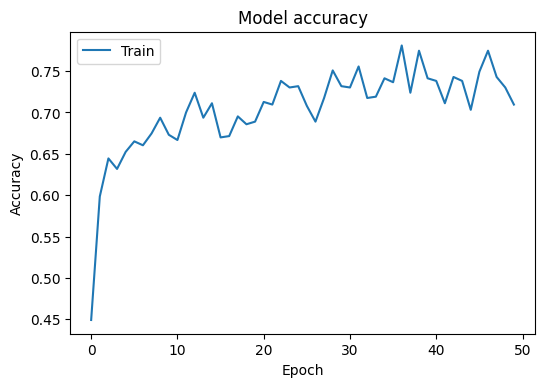

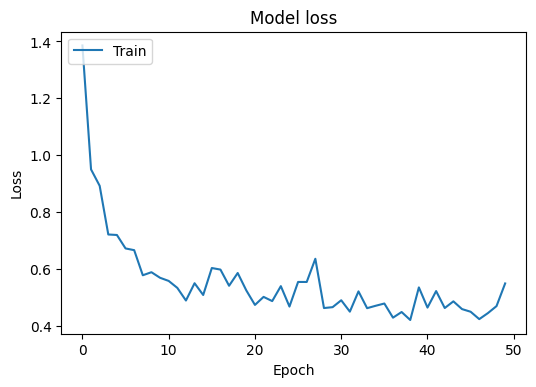

In [18]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
plt.rcParams['figure.figsize']=[6,4]
plt.rcParams['figure.dpi'] = 100

print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()